# Project 4: Introduction to Deep Learning
## Name - Mahvash Maghrabi

## Task 1 - MNIST Tutorial

In [5]:
# Importing necessary libraries
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [6]:
# Preparing the dataset
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [7]:
# Using torchvison to define dataloaders for the dataset
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('/Users/mahvashmaghrabi/Desktop/CS6140', train=True, download=True,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor(),
                                   torchvision.transforms.Normalize(
                                       (0.1307,), (0.3081,))
                               ])),
    batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('/Users/mahvashmaghrabi/Desktop/CS6140', train=False, download=True,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor(),
                                   torchvision.transforms.Normalize(
                                       (0.1307,), (0.3081,))
                               ])),
    batch_size=batch_size_test, shuffle=True)


In [8]:
# Using test_loader as an example
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [9]:
# test data batch shape
example_data.shape

torch.Size([1000, 1, 28, 28])

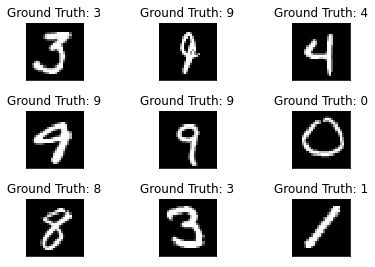

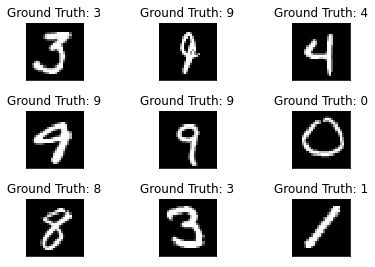

In [23]:
# Plotting test data batch
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig


In [12]:
# Building the convolutional neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [13]:
# Initializing the network and the optimizer.
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [25]:
# Creating lists
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [15]:
# Training function
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), '/Users/mahvashmaghrabi/Desktop/CS6140/results/model.pth')
      torch.save(optimizer.state_dict(), '/Users/mahvashmaghrabi/Desktop/CS6140/results/optimizer.pth')

In [16]:
# Testing function
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [17]:
# Running the training function
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3096, Accuracy: 924/10000 (9%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.313179
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.300776
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.298872
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.276723
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.241102
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.248662
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.189547
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.146399
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.107701
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.011356
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.843857
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.758839
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.672644
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.687645
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.426628
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.284204
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.318824
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.445287
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.140686
Train Epoch: 1 [12160/6

Train Epoch: 2 [44160/60000 (74%)]	Loss: 0.402380
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.235672
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.501916
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.273032
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.286991
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.199715
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.265543
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.350921
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.453964
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.274801
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.323558
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.450055
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.304516
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.336175
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.252669
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.246477
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.193689
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.487172
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.203448
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.385233


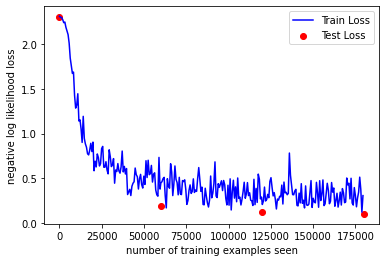

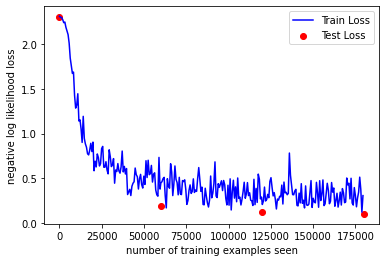

In [18]:
# Plotting the training curve
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig


In [19]:
# Looking at more examples to compare the model's output
with torch.no_grad():
  output = network(example_data)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


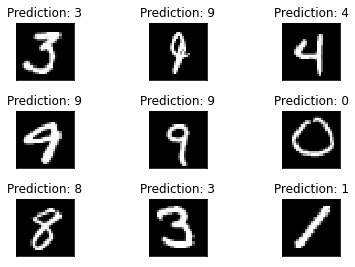

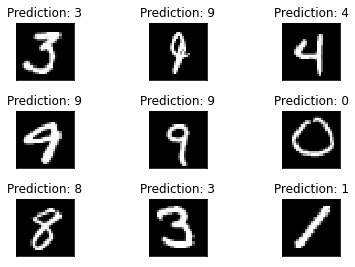

In [24]:
# Plotting the model's predictions
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
fig


In [36]:
# Continued training
continued_network = Net()
continued_optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                                momentum=momentum)

In [54]:
# Loading the internal state of the network and optimizing when we last saved it
network_state_dict = torch.load()
continued_network.load_state_dict(network_state_dict)

optimizer_state_dict = torch.load()
continued_optimizer.load_state_dict(optimizer_state_dict)

In [56]:
# Running the training loop
for i in range(4,9):
  test_counter.append(i*len(train_loader.dataset))
  train(i)
  test()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 4 [0/60000 (0%)]	Loss: 0.199653
Train Epoch: 4 [640/60000 (1%)]	Loss: 0.351604
Train Epoch: 4 [1280/60000 (2%)]	Loss: 0.339353
Train Epoch: 4 [1920/60000 (3%)]	Loss: 0.389070
Train Epoch: 4 [2560/60000 (4%)]	Loss: 0.504175
Train Epoch: 4 [3200/60000 (5%)]	Loss: 0.127469
Train Epoch: 4 [3840/60000 (6%)]	Loss: 0.284711
Train Epoch: 4 [4480/60000 (7%)]	Loss: 0.351655
Train Epoch: 4 [5120/60000 (9%)]	Loss: 0.161544
Train Epoch: 4 [5760/60000 (10%)]	Loss: 0.202799
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.177537
Train Epoch: 4 [7040/60000 (12%)]	Loss: 0.149663
Train Epoch: 4 [7680/60000 (13%)]	Loss: 0.226582
Train Epoch: 4 [8320/60000 (14%)]	Loss: 0.395716
Train Epoch: 4 [8960/60000 (15%)]	Loss: 0.459847
Train Epoch: 4 [9600/60000 (16%)]	Loss: 0.145748
Train Epoch: 4 [10240/60000 (17%)]	Loss: 0.154317
Train Epoch: 4 [10880/60000 (18%)]	Loss: 0.468143
Train Epoch: 4 [11520/60000 (19%)]	Loss: 0.151087
Train Epoch: 4 [12160/60000 (20%)]	Loss: 0.231531
Train Epoch: 4 [12800/60000 (

Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.442021
Train Epoch: 5 [45440/60000 (76%)]	Loss: 0.243885
Train Epoch: 5 [46080/60000 (77%)]	Loss: 0.231680
Train Epoch: 5 [46720/60000 (78%)]	Loss: 0.230430
Train Epoch: 5 [47360/60000 (79%)]	Loss: 0.183203
Train Epoch: 5 [48000/60000 (80%)]	Loss: 0.353325
Train Epoch: 5 [48640/60000 (81%)]	Loss: 0.231832
Train Epoch: 5 [49280/60000 (82%)]	Loss: 0.196401
Train Epoch: 5 [49920/60000 (83%)]	Loss: 0.362897
Train Epoch: 5 [50560/60000 (84%)]	Loss: 0.108576
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.329589
Train Epoch: 5 [51840/60000 (86%)]	Loss: 0.166029
Train Epoch: 5 [52480/60000 (87%)]	Loss: 0.294716
Train Epoch: 5 [53120/60000 (88%)]	Loss: 0.103354
Train Epoch: 5 [53760/60000 (90%)]	Loss: 0.131692
Train Epoch: 5 [54400/60000 (91%)]	Loss: 0.126307
Train Epoch: 5 [55040/60000 (92%)]	Loss: 0.283026
Train Epoch: 5 [55680/60000 (93%)]	Loss: 0.145282
Train Epoch: 5 [56320/60000 (94%)]	Loss: 0.172344
Train Epoch: 5 [56960/60000 (95%)]	Loss: 0.387016


Train Epoch: 7 [28800/60000 (48%)]	Loss: 0.267540
Train Epoch: 7 [29440/60000 (49%)]	Loss: 0.136226
Train Epoch: 7 [30080/60000 (50%)]	Loss: 0.048404
Train Epoch: 7 [30720/60000 (51%)]	Loss: 0.135715
Train Epoch: 7 [31360/60000 (52%)]	Loss: 0.175969
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.252115
Train Epoch: 7 [32640/60000 (54%)]	Loss: 0.189051
Train Epoch: 7 [33280/60000 (55%)]	Loss: 0.141998
Train Epoch: 7 [33920/60000 (57%)]	Loss: 0.232173
Train Epoch: 7 [34560/60000 (58%)]	Loss: 0.193580
Train Epoch: 7 [35200/60000 (59%)]	Loss: 0.183390
Train Epoch: 7 [35840/60000 (60%)]	Loss: 0.272779
Train Epoch: 7 [36480/60000 (61%)]	Loss: 0.133639
Train Epoch: 7 [37120/60000 (62%)]	Loss: 0.129038
Train Epoch: 7 [37760/60000 (63%)]	Loss: 0.132612
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.250940
Train Epoch: 7 [39040/60000 (65%)]	Loss: 0.233324
Train Epoch: 7 [39680/60000 (66%)]	Loss: 0.218222
Train Epoch: 7 [40320/60000 (67%)]	Loss: 0.323035
Train Epoch: 7 [40960/60000 (68%)]	Loss: 0.310936


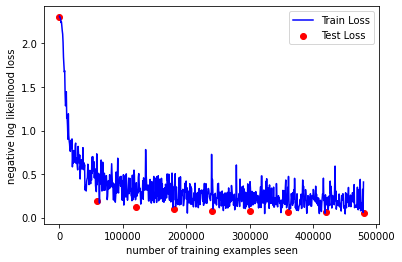

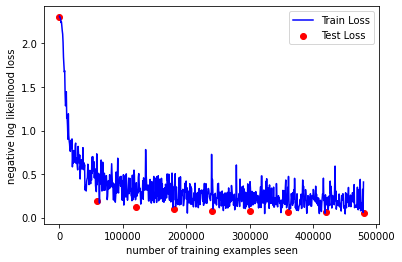

In [57]:
# Plotting the training curve
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig